# Loan Data from Prosper
## by Faisal Almalki

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan that means 9228897 cell, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import dates as mpl_dates
from datetime import date


%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv("prosperLoanData.csv")

df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.shape

(113937, 81)

In [4]:
# describe function can be really helpful when you investigate about numerical data like this
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [5]:
sum(df.duplicated())

0

### cleaning section  (define)
 - creating another column called Term_by_year and it will be string 
 - creating another column called LoanOriginaionDateYear and it will be string 
 - drop all columns that we will never use in this investigations (Note: some of could be possible important but we will drop it just because we don't interet about them know)
 - in LoanStatus convert all past due cell to "Past Due"

In [6]:
dfNew = df.copy()

In [7]:
dfNew.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [8]:
# remove columns and columns with empty values that are not useful in the Dateset
dfNew.drop(['ListingKey', 'LoanNumber', 'ListingNumber', 'CreditGrade', "EstimatedEffectiveYield", "EstimatedLoss", "EstimatedReturn", 'ClosedDate', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber',
           "LP_ServiceFees", "LP_CollectionFees", 'BankcardUtilization', "LP_GrossPrincipalLoss", "LP_NetPrincipalLoss", "IncomeVerifiable", "LP_NonPrincipalRecoverypayments", "PercentFunded", "Recommendations" , "InvestmentFromFriendsCount" ,"InvestmentFromFriendsAmount", "MemberKey", "MonthlyLoanPayment", "LP_CustomerPayments", "LP_CustomerPrincipalPayments", "LP_InterestandFees", "Investors", "LoanOriginationQuarter"], axis=1, inplace = True)

In [9]:
dfNew.head()

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),...,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate
0,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,NaN,0,...,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",3083.333333,78,9425,2007-09-12 00:00:00
1,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,0.0820,6.0,A,7.0,2,...,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",6125.000000,0,10000,2014-03-03 00:00:00
2,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,0.06,Not displayed,2083.333333,86,3001,2007-01-17 00:00:00
3,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,0.0874,6.0,A,9.0,16,...,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",2875.000000,16,10000,2012-11-01 00:00:00
4,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,0.1985,3.0,D,4.0,2,...,695.0,39.0,0.95,2.0,0.26,"$100,000+",9583.333333,6,15000,2013-09-20 00:00:00


In [10]:
#code 
dfNew.insert (39, "LoanOriginationDateYear", dfNew['LoanOriginationDate'].str[:4])

In [11]:
dfNew.LoanOriginationDateYear.unique()

array(['2007', '2014', '2012', '2013', '2006', '2010', '2011', '2008',
       '2009', '2005'], dtype=object)

In [12]:
dfNew.insert (39, "LoanOriginationDateYear1", pd.to_datetime(dfNew['LoanOriginationDateYear'], format='%Y/'))

In [13]:
#test
dfNew.LoanOriginationDateYear1.unique()

array(['2007-01-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2006-01-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000', '2008-01-01T00:00:00.000000000',
       '2009-01-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [14]:
# 12 = year, 36 = 3 years, 60 = 50 years
# we will create another columna called term_by_year
dfNew.Term.unique()

array([36, 60, 12], dtype=int64)

In [15]:
dfNew.insert (2, "Term_by_year", df.Term / 12)

In [16]:
# dfNew.insert (2, "Term_by_year", EmploymentStatus)

In [17]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 43 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   ListingCreationDate                 113937 non-null  object        
 1   Term                                113937 non-null  int64         
 2   Term_by_year                        113937 non-null  float64       
 3   LoanStatus                          113937 non-null  object        
 4   BorrowerAPR                         113912 non-null  float64       
 5   BorrowerRate                        113937 non-null  float64       
 6   LenderYield                         113937 non-null  float64       
 7   ProsperRating (numeric)             84853 non-null   float64       
 8   ProsperRating (Alpha)               84853 non-null   object        
 9   ProsperScore                        84853 non-null   float64       
 10  ListingC

In [18]:
# convert Term By Year to int than to string

dfNew['Term_by_year'] = dfNew['Term_by_year'].astype(int)
dfNew['Term_by_year'] = dfNew['Term_by_year'].astype(str)

## change it to the following

dfNew.Term_by_year = dfNew['Term_by_year'].map({'3':'3 years',
                             '5':'5 years',
                             '1':'1 year'},
                             na_action=None)

In [19]:
#testing the type 
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 43 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   ListingCreationDate                 113937 non-null  object        
 1   Term                                113937 non-null  int64         
 2   Term_by_year                        113937 non-null  object        
 3   LoanStatus                          113937 non-null  object        
 4   BorrowerAPR                         113912 non-null  float64       
 5   BorrowerRate                        113937 non-null  float64       
 6   LenderYield                         113937 non-null  float64       
 7   ProsperRating (numeric)             84853 non-null   float64       
 8   ProsperRating (Alpha)               84853 non-null   object        
 9   ProsperScore                        84853 non-null   float64       
 10  ListingC

In [20]:
#testing the values 
dfNew.Term_by_year.unique()

array(['3 years', '5 years', '1 year'], dtype=object)

In [21]:
dfNew.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [22]:
#code
dfNew.LoanStatus = dfNew['LoanStatus'].map({"Completed": "Completed",
                                            "Current": "Current",
                                            "Defaulted": "Defaulted",
                                            "Chargedoff": "Chargedoff",
                                            "Cancelled": "Cancelled",
                                            "FinalPaymentInProgress": "FinalPaymentInProgress",
                                            "Past Due (1-15 days)": "Past Due",
                                            "Past Due (16-30 days)": "Past Due",
                                           "Past Due (31-60 days)": "Past Due",
                                           "Past Due (61-90 days)": "Past Due",
                                           "Past Due (91-120 days)": "Past Due",
                                           "Past Due (>120 days)": "Past Due"},  na_action=None)


# dfNew[dfNew.LoanStatus[dfNew.LoanStatus(df.LoanStatus).str.startswith("Co")]]

# df[df.columns[pd.Series(df.columns).str.startswith('foo')]]

# df.b.str.contains('^f')

In [23]:
#test
dfNew[dfNew['LoanStatus'] == "Past Due"].count()[0]

2067

In [24]:
dfNew.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due                   2067
FinalPaymentInProgress      205
Cancelled                     5
Name: LoanStatus, dtype: int64

### What is the structure of your dataset?

> I have 81 columns and 113937 rows so I have 9220797 millions cell

### What is/are the main feature(s) of interest in your dataset?

> infomation on the borrow's APR, status, borrowed amount, debt, etc. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

###### my investigation will be about three main questions
    1- how can we determine if the Borrowers will past due the loan or not?
    2- What affects the borrower’s APR or interest rate?
    3- Are there differences between loans depending on how large the original loan amount was?
    
###### I believe BorrowerAPR, ProsperRating (Alpha), and others features will help me throught my investigation



### we end the cleaning part

## Univariate Exploration

In [25]:
prosperRating = dfNew["ProsperRating (Alpha)"].value_counts()
prosperRating

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

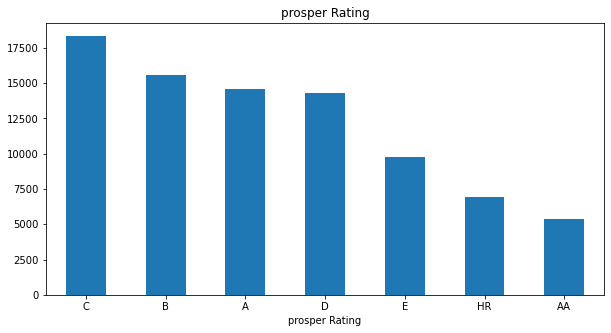

In [26]:
plt.figure(figsize=(10, 5))
prosperRating.plot(kind='bar', rot=0);

plt.title('prosper Rating');
plt.xlabel('prosper Rating');

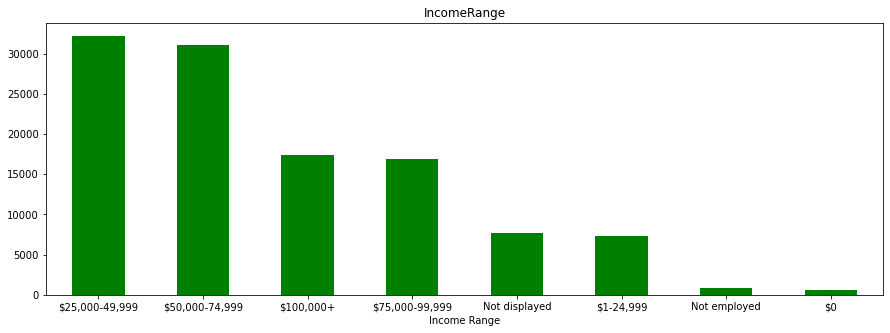

In [27]:
##IncomeRange
IncomeRange = dfNew["IncomeRange"].value_counts()

plt.figure(figsize=(15, 5))
IncomeRange.plot(kind='bar', rot=0, color="green");

plt.title('IncomeRange');
plt.xlabel('Income Range');

array([[<AxesSubplot:title={'center':'LoanOriginalAmount'}>]],
      dtype=object)

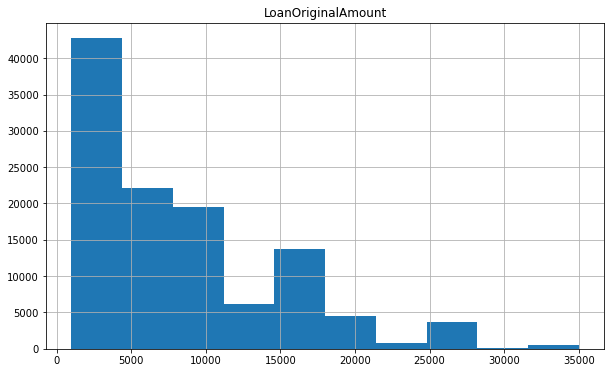

In [28]:
dfNew.hist(column='LoanOriginalAmount', figsize=(10,6))

### insights
        - there is more than 17500 Borrowers have grade "C", "C" grade is the hieghst grade in the chart
        - there is around 5000 Borrowers with grade "AA" and it's the lowest grade in the chart people 
        - Prosper tring to avoid people that don't have income below $75000
        - Borrowers tend to get small loan
        - Borrowers preferd not taking huge loan
        - TheLoanOriginalAmount chart is right skewed.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
>  the Loan original amount chart is right skewed or (positively skewed), we observed outliers in the data but we didn't remove any outliers until know


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> I preform three main operations on the data
first: I created anothe column called Term_by_year and the reason is that I want make it clear there is just three types of loan 1 year, 3 years, and 5 years
second: I create new column called LoanOriginationDateYear and this column it's just count the year the loan start without month or day so it's just to make things more clean
thired: I removed all the columns that I will never used like example: 'ListingKey', 'LoanNumber', 'ListingNumber', 'CreditGrade', "EstimatedEffectiveYield", "EstimatedLoss"

## Bivariate Exploration

Text(0.5, 1.0, 'All the loan')

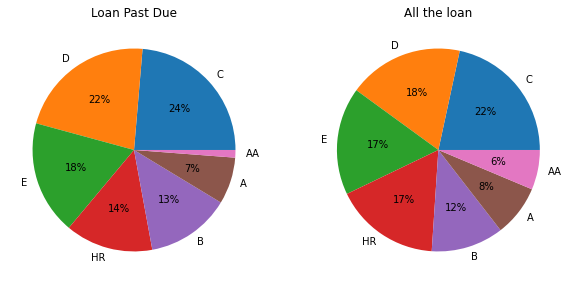

In [29]:
fig, (pltPast,pltNew) = plt.subplots(1,2,figsize=(10,10))


def autopct_more_than_1(pct):
    return ('%1.f%%' % pct) if pct > 2 else ''
# select all the Past Due columns
dfPastDue = dfNew[dfNew["LoanStatus"] == "Past Due"]
#Past Due
df_past_counts = dfPastDue['ProsperRating (Alpha)'].value_counts()

pltPast.pie(df_past_counts, labels = df_past_counts.index, autopct=autopct_more_than_1,);
pltPast.set_title("Loan Past Due")

dfNew_counts = dfNew['ProsperRating (Alpha)'].value_counts()

pltNew.pie(dfNew_counts, labels = df_past_counts.index, autopct=autopct_more_than_1);
pltNew.set_title("All the loan")


<AxesSubplot:title={'center':'orginal amount in every year'}, xlabel='Term_by_year', ylabel='LoanOriginalAmount'>

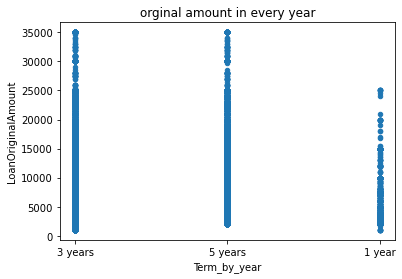

In [30]:
dfNew.plot.scatter(x='Term_by_year', y='LoanOriginalAmount', title="orginal amount in every year")

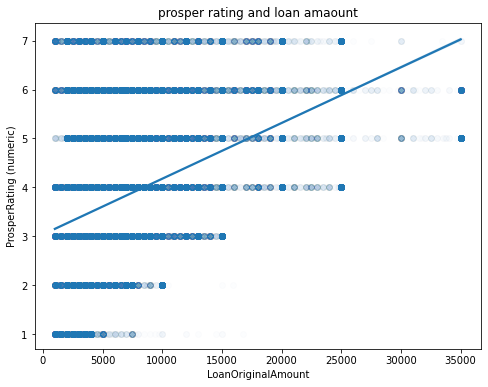

In [31]:
plt.figure(figsize = [8, 6])
sb.regplot(data = dfNew, x = 'LoanOriginalAmount', y = "ProsperRating (numeric)", scatter_kws={'alpha':0.01}).set_title("prosper rating and loan amaount");

### insights
    - clients with grade "AA" have more potinal to pay the loan in the time
    - clients with C or less have more potental to be past due
    - we recommend to work with people how have grade "B" or above
    - people intanse to like pay there big loan (25000 or above) in 3 years or 5 years  .
    - people intanse to like pay they loan in 3 years.
    - Borrowers with grade between (1-3) can't take more than $15000 as loan and it will be resiky if we did let them do
    
   ###### note : Prosper Ratings allow potential investors to easily consider a loan application's level of risk because the rating represents an estimated average annualized loss rate range to the investor.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> We can say there is a positive realtion between the orginal amount that the Borrower will take and the Prosper rating, 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> There is relationship between the Prosper rating and the borrower who past due the date, borrower who past due the date most of them have lower grade

## Multivariate Exploration

most people like to take small loans people try to avoid taking loans above \\$25000 or above and when they do take huge loan they preferd to complete it in 3 or 5 years, however when the loan is small under \\$10000 they tried to complete it in 3 years or 1 year.
Borrowers with grade "B" or above they most likely will avoid past due there loan date, insted people with grade "D" or less there is a big chance they will past due the date.
Ther is a positive relationships between the ProsperRating and the loan amount


In [32]:
dfSort = dfNew.sort_values(by="LoanOriginationDateYear", key=pd.to_datetime)

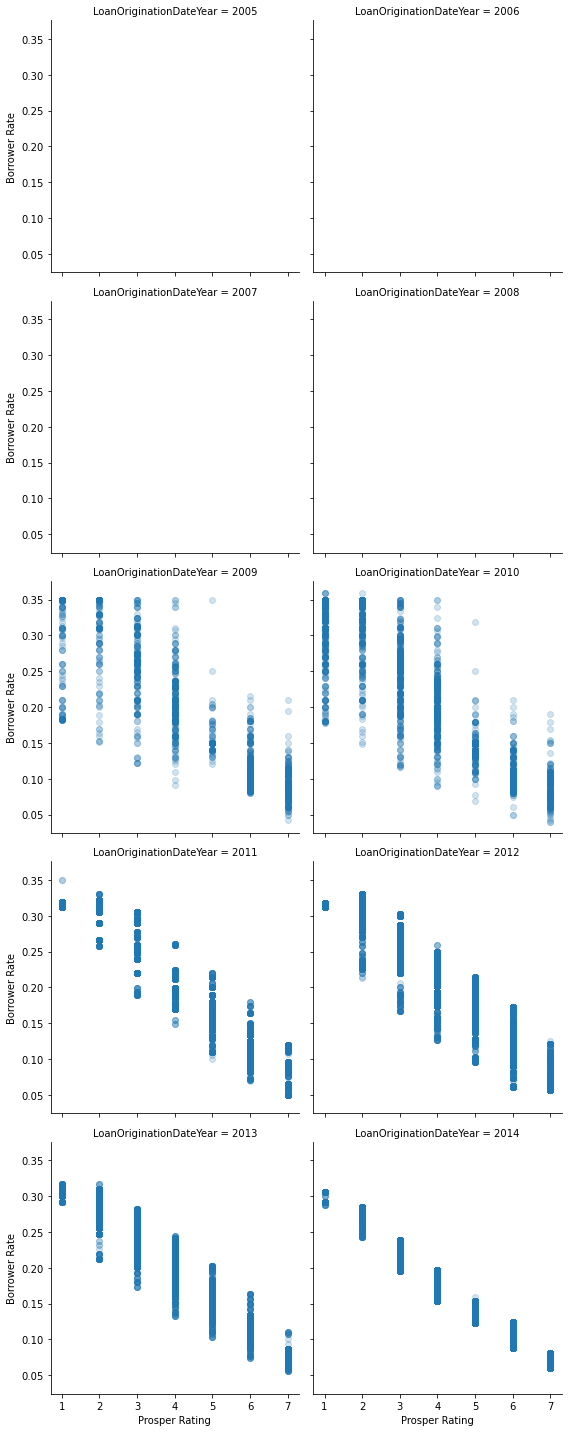

In [33]:
ch = sb.FacetGrid(data = dfSort, col = 'LoanOriginationDateYear', col_wrap = 2, height = 4)
ch.map(plt.scatter, 'ProsperRating (numeric)', 'BorrowerRate', alpha=0.2)
ch.set_xlabels('Prosper Rating')
ch.set_ylabels('Borrower Rate')
plt.show()

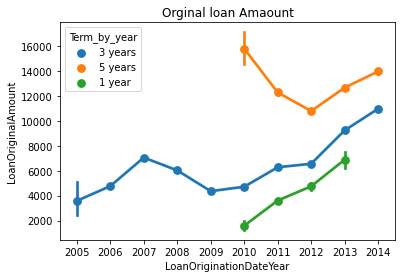

In [34]:
sb.pointplot(data=dfSort, x='LoanOriginationDateYear', y='LoanOriginalAmount', hue="Term_by_year" ).set_title("Orginal loan Amaount");

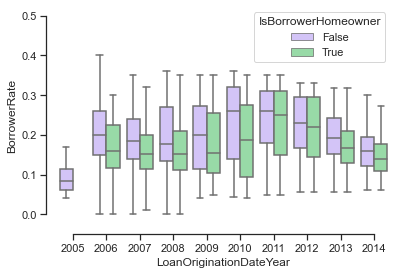

In [35]:
sb.set_theme(style="ticks", palette="pastel")


sb.boxplot(data=dfSort, x="LoanOriginationDateYear", y="BorrowerRate",
            hue="IsBorrowerHomeowner", palette=["m", "g"], fliersize=0)
sb.despine(offset=10, trim=True)

### isnight:
    - high grade means good Borrower rate 
    - sometimes the Borrowers have a good rate but the the Borrower rate goes up for other reasons
    - loan in 1 and 5 years start in 2010 
    - in 2006 the Borrower Rate reach to 0.4
    - the Borrowers who don't have house tend to have high Borrow rate 
    - it's seems Prosper consider the Borrowers who have home have more potential to to pay off the loan

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest

> there is relationship between which the borrower is home woner or not with the Borrower Rate, and that mean if you have a house you will get lower Borrower rate.

### were there any interesting of surprising interactions between features?
> the interactions between the Borrower rate and "IsBorrowerHomeowner" column was interesting for me because I didn't thought there will be realsionship between them.